# <b>背景</b>

目前妊娠期糖尿病（GDM）的诊断依靠糖耐量试验（OGTT），一种葡萄糖负荷试验，用以了解胰岛β细胞功能和机体对血糖的调节能力，是诊断糖尿病的确诊试验。诊断GDM的标准为空腹血糖≥5.1mmol/L，1小时≥10.0mmol/L，2小时大于等于8.5mmol/L。如果空腹血糖≥7.0mmol/L，或者2小时血糖大于≥11.1mmol/L，则诊断为糖尿病DM。

糖化血红蛋白（HbA1c）是判断糖尿病患者血糖控制良好与否非常重要的一个指标，可以反映患者近8-12周的血糖控制情况。糖化血红蛋白（HbA1c）在妊娠期没有明确的参考值范围，当HbA1c≥6.5%，则诊断为DM。对于诊断GDM则没有参考值。

# <b>任务</b>

 通过ROC曲线评估HbAc1的诊断GDM(或DM）的效果

# <b>第一步 引包 </b>

In [1]:
#引包：引入所需python包
import xlrd
import os
import re
import time
import itertools
import pandas as pd
import numpy as np
from numpy import nan
from sklearn.metrics import roc_curve,auc
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import mannwhitneyu
from scipy.stats import kstest
from scipy.stats import chisquare   
from scipy.stats import chi2
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# <b>第二步 获取数据源</b>
设置默认文件目录

读取csv文件

In [2]:
dir = r"./output/"
print(os.listdir(dir))

['clean_data.csv']


In [6]:
HbA1c_ref = pd.read_csv(dir+"clean_data.csv",index_col=0) #第一列为行索引
HbA1c_ref = HbA1c_ref.drop(columns = HbA1c_ref.columns[0]) #删除不需要的列
HbA1c_ref.head(2)

,INSPECTION_ID,登记号,检查日期,科室,诊断,检验目的,审核时间,项目名称,HbA1c,单位,参考值,year,age,age_range,OGTT_date,OGTT_0,OGTT_1,OGTT_2,STATUS
107,20130104G0460006,1400685.0,20130104,CKMZ-产科门诊,24+3周宫内孕活胎,糖化血红蛋白,2013-01-04 12:16:12,糖化血红蛋白A1c,5.5,%,4.1-6.8,2013,29,"(22.0, 30.0]",20130104,4.9,8.4,7.4,health
219,20130107G0460006,1385957.0,20130107,CKMZ-产科门诊,24+6周宫内孕活胎,糖化血红蛋白,2013-01-07 14:43:57,糖化血红蛋白A1c,5.2,%,4.1-6.8,2013,36,"(35.0, 42.0]",20130107,4.8,7.4,5.3,health


# <b>第三步 评估HbAc1诊断GDM的效果 </b>

thresholds：阀值

False positive rat(fpr)：假阳性

True positive rate((tpr):真阳性

youden_index:约登指数

<b> 第一种方式：约登指数 </b>

1) 计算约登指数

2）最大约登指数，确定最优阀值

3）绘制ROC_AUC图，计算AUC面积

AUC越大越好，接近1越好，接近0.5效果较差

In [7]:
fpr,tpr,thresholds = roc_curve(HbA1c_ref["STATUS"],HbA1c_ref["HbA1c"],pos_label="GDM")   #将pos_label替换成DM就可以评估HbAc1诊断DM的效果。
result =pd.DataFrame(fpr,thresholds)
result["thresholds"] =result.index.values
result =result.reset_index(drop=True)
result["tpr"]=tpr
result=result.iloc[:,[1,0,2]]
result.columns =["HbA1c_thresholds","False positive rate(x)","True positive rate(y)"]
#print(result)
result["youden index"] = result["True positive rate(y)"]-result["False positive rate(x)"]
result

,HbA1c_thresholds,False positive rate(x),True positive rate(y),youden index
0,12.8,0.000000,0.000000,0.000000
1,11.8,0.000134,0.000000,-0.000134
2,7.3,0.000269,0.000000,-0.000269
3,7.0,0.000806,0.000000,-0.000806
4,6.6,0.001210,0.000000,-0.001210
5,6.5,0.001747,0.000428,-0.001319
6,6.4,0.001747,0.001284,-0.000464
7,6.3,0.002419,0.002995,0.000576
8,6.2,0.003091,0.005135,0.002043
9,6.1,0.004032,0.007274,0.003242


最优阀值：约登指数最大的行

绘制ROC_AUC曲线,计算曲线下面积

AUC面积越大越好。

In [10]:
maxindex = result["youden index"].max()
result[result["youden index"]==maxindex]

,HbA1c_thresholds,False positive rate(x),True positive rate(y),youden index
19,5.1,0.331183,0.559692,0.228509


roc_auc :  0.6550460451548489


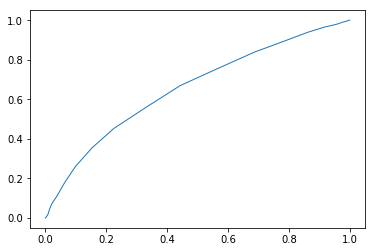

In [9]:
roc_auc=auc(fpr,tpr)   
print ("roc_auc : ",roc_auc)
plt.plot(fpr,tpr,lw=1,label="ROC %s (area =%0.3f)" % ("HbA1c",roc_auc))

<b> 2)第二种方式 最优点 </b>

获得最优点对应的阀值后，用上面的方法可以计算AUC面积


In [14]:
#the optimal cut off  point 
import pylab as pl
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]
#the optimal cut off is 5.1 ,so anything above this can be labeled as 1 else 0

,fpr,tpr,1-fpr,tf,thresholds
19,0.331183,0.559692,0.668817,-0.109125,5.1


[]

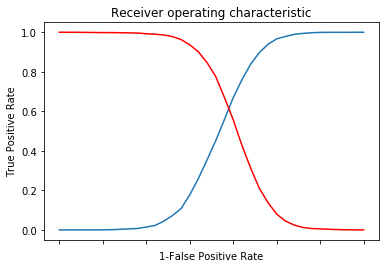

In [12]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

# 结论
AUC = 0.655 偏小，诊断效果不明显